In [20]:
import pandas as pd
from sdv import SDV
from sdv import Metadata
from sdv.tabular import GaussianCopula
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate

In [7]:
nhan_df = pd.read_csv('NHANES_Data_2011-2012.csv')

In [8]:
nhan_df


,Measured_Diabetes_x2,SEQN,Gender,Age,Race,Birth_Country,Citizenship,Edu_Adult,Marital_Status,FAM_Income_Poverty_Ratio,HH_Numb,BMI,Health_Insurance,A1c
0,0,62161,Male,22,White,US,US Citizen,High School Leve,Never married,3.15,5,23.3,1,5.1
1,0,62164,Female,44,White,US,US Citizen,Some College,Married,1.67,5,23.2,1,4.9
2,0,62169,Male,21,Asian,US,US Citizen,High School Leve,Never married,0.33,5,20.1,2,5.4
3,0,62172,Female,43,Black,US,US Citizen,High School Leve,Never married,2.02,1,33.3,1,5.6
4,1,62178,Male,80,White,US,US Citizen,High School Leve,Widowed,0.05,1,28.5,1,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,0,71895,Male,31,Asian,Other,Not a Citizen,College Graduate,Married,2.30,3,20.6,1,5.0
2079,1,71898,Female,65,Mexican American,US,US Citizen,Some College,Married,3.97,2,29.4,1,5.7
2080,0,71909,Male,28,Mexican American,US,US Citizen,Middle school level,Never married,0.46,2,29.4,2,5.3
2081,0,71911,Male,27,Mexican American,US,US Citizen,College Graduate,Married,3.25,5,31.3,1,4.7


In [25]:

black_nhan = nhan_df[nhan_df['Race'] == 'Black'] 

black_nhan

,Measured_Diabetes_x2,SEQN,Gender,Age,Race,Birth_Country,Citizenship,Edu_Adult,Marital_Status,FAM_Income_Poverty_Ratio,HH_Numb,BMI,Health_Insurance,A1c
3,0,62172,Female,43,Black,US,US Citizen,High School Leve,Never married,2.02,1,33.3,1,5.6
5,0,62184,Male,26,Black,US,US Citizen,High School Leve,Never married,3.85,7,22.1,1,4.5
7,0,62195,Male,35,Black,Other,US Citizen,Some College,Living with Partner,2.39,4,28.2,1,5.4
13,0,62214,Female,22,Black,US,US Citizen,High School Leve,Seperated,1.41,5,23.8,1,5.2
15,1,62218,Female,38,Black,US,US Citizen,Some College,Never married,4.05,3,45.4,2,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,0,71740,Female,20,Black,US,US Citizen,Some College,Never married,0.44,5,20.4,2,5.4
2051,1,71777,Female,77,Black,US,US Citizen,Middle school level,Married,0.87,4,24.8,1,6.1
2056,0,71803,Female,52,Black,US,US Citizen,High School Leve,Divorced,0.57,6,34.8,2,6.0
2065,1,71836,Male,65,Black,US,US Citizen,Some College,Married,5.00,2,32.4,1,5.8


In [13]:
nhan_df.Private_Insurance.value_counts()
nhan_df.Health_Insurance.value_counts()

1    3300
2     633
Name: Health_Insurance, dtype: int64

In [8]:
metadata = Metadata()
metadata.add_table(
name ='NHANES',
data=nhan_df,
primary_key = 'SEQN')

In [40]:
model = GaussianCopula(
primary_key = 'SEQN'



)
model.fit(nhan_df)

In [46]:
new_data = model.sample(10000)

In [18]:
distribut = model.get_distributions()

In [42]:
new_data

,Measured_Diabetes_x2,SEQN,Gender,Age,Race,Birth_Country,Citizenship,Edu_Adult,Marital_Status,HH_Numb,FAM_Income_Poverty_Ratio,BMI,Health_Insurance,A1c
0,0,0,Male,55,White,USA,Citizen,Some_College,Married,3,1.591632,41.135311,Yes,5.531830
1,0,1,Female,35,Hispanic,Other,Citizen,HS_Grad,Divorced,2,1.216861,29.111443,Yes,5.366458
2,0,2,Female,72,Hispanic,USA,Citizen,College_Grad,Married,2,1.822570,21.305482,Yes,5.575219
3,0,3,Female,64,White,USA,Citizen,Some_College,Married,6,0.784995,31.138889,Yes,5.807406
4,0,4,Male,56,Hispanic,Other,Citizen,HS_Grad,Married,7,0.723040,27.160144,Yes,5.271602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,995,Male,40,Hispanic,USA,Citizen,College_Grad,Married,3,4.538295,26.110482,Yes,5.554083
996,0,996,Male,25,Other,USA,Citizen,College_Grad,Married,4,1.998492,25.436465,Yes,6.611644
997,0,997,Male,48,White,USA,Citizen,College_Grad,Never_Married,1,3.742813,36.523056,Yes,5.505991
998,0,998,Female,76,Hispanic,USA,Citizen,Some_College,Divorced,2,4.366533,25.935438,Yes,5.277456


In [47]:
new_data.Race.value_counts()

White       6219
Hispanic    2534
Other       1122
Black        114
Asian         11
Name: Race, dtype: int64

In [13]:
nhan_df.Race.value_counts()

White               833
Black               469
Asian               289
Hispanic            219
Mexican American    217
Other                56
Name: Race, dtype: int64

In [20]:
new_data.Health_Insurance.value_counts()

1    177
2     23
Name: Health_Insurance, dtype: int64

In [26]:
new_data.Race.value_counts()

3    714
7    213
4     62
6      9
1      2
Name: Race, dtype: int64

In [24]:
nhan_df.Race.value_counts()

3    1405
4     821
1     572
6     502
2     450
7     183
Name: Race, dtype: int64

In [35]:
nhan_df.Gender.value_counts()

2    1987
1    1946
Name: Gender, dtype: int64

In [9]:

ctmodel = CTGAN(
primary_key = 'SEQN'
)
ctmodel.fit(nhan_df)

C:\Users\Public\anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Public\anaconda\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\Users\Public\anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Public\anaconda\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check f

In [10]:
ct_new = ctmodel.sample(10000)

In [11]:
ct_new.Gender.value_counts()

Female    6085
Male      3915
Name: Gender, dtype: int64

In [33]:
ct_new.head()

,Measured_Diabetes_A1c,Measured_Diabetes_x2,Measured_Diabetes,Dr_Diabetes_Binary,Dr_Diabetes,Pre_Dia,SEQN,Gender,Age,Race,...,Weight_kg,Height_cm,BMI,Len_Leg,Len_Arm,Waist,Fasting_Glucose,A1c,Health_Insurance,Private_Insurance
0,YES,YES,YES,YES,0,1,93147,1,58,2,...,123.217268,156.646992,27.190376,33.830737,35.623787,158.281420,174,10.455515,1,14
1,YES,YES,YES,YES,2,1,98852,0,65,4,...,128.285969,173.656958,33.965885,44.258597,44.174999,151.942772,86,7.832389,1,0
2,YES,YES,YES,YES,1,0,94481,2,77,1,...,86.668218,161.346401,35.281128,37.173319,43.718591,115.079414,138,5.236565,0,0
3,YES,NO,NO,NO,2,2,99695,0,21,1,...,94.253343,183.448745,35.058106,42.698819,43.274131,106.410180,76,4.682299,0,14
4,NO,NO,NO,NO,2,2,96212,0,26,1,...,81.804394,171.382482,19.843859,41.886658,37.633467,67.652093,102,5.006893,0,0


In [12]:
ct_new.Race.value_counts()

White               4283
Hispanic            1598
Asian               1593
Black               1400
Mexican American     887
Other                239
Name: Race, dtype: int64

In [17]:
conditions = {
    'Race' : 'Black'
}
black_sample = ctmodel.sample(100,conditions=conditions)

In [18]:
black_sample

,Measured_Diabetes_x2,SEQN,Gender,Age,Race,Birth_Country,Citizenship,Edu_Adult,Marital_Status,FAM_Income_Poverty_Ratio,HH_Numb,BMI,Health_Insurance,A1c
0,0,0,Male,24,Black,Other,Not a Citizen,High School Leve,Widowed,0.225860,2,16.606448,1,6.530671
1,0,1,Female,29,Black,US,US Citizen,High School Leve,Married,0.222344,4,24.444514,0,5.382098
2,0,2,Male,70,Black,US,US Citizen,Some College,Never married,2.826571,5,22.887267,1,5.883926
3,0,3,Female,63,Black,US,US Citizen,College Graduate,Widowed,4.925930,3,37.485242,0,5.187910
4,0,4,Female,21,Black,US,US Citizen,Some College,Living with Partner,1.209148,2,27.971936,1,6.392281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,95,Female,28,Black,US,US Citizen,Less than 9th grade,Married,0.384401,4,16.555303,1,6.019994
96,0,96,Female,50,Black,Other,Not a Citizen,Middle school level,Married,0.458778,2,39.805686,1,6.473116
97,0,97,Female,51,Black,Other,US Citizen,High School Leve,Married,2.972995,4,30.153631,1,4.450086
98,0,98,Male,66,Black,Other,Not a Citizen,College Graduate,Married,-0.433668,3,34.221004,1,7.308383


In [19]:
black_sample.Measured_Diabetes_x2.value_counts()

0    94
1     6
Name: Measured_Diabetes_x2, dtype: int64

In [21]:
evaluate(ct_new,nhan_df)

C:\Users\Public\anaconda\lib\site-packages\sdmetrics\base.py:97: RuntimeWarning: overflow encountered in exp
  score = 1 / (1 + np.exp(-raw_score))
C:\Users\Public\anaconda\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
C:\Users\Public\anaconda\lib\site-packages\pandas\core\frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
C:\Users\Public\anaconda\lib\site-packages\sdmetrics\column_pairs\statistical\kl_di

0.4358738262568304

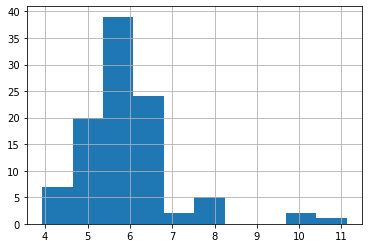

In [22]:
black_sample.A1c.hist()

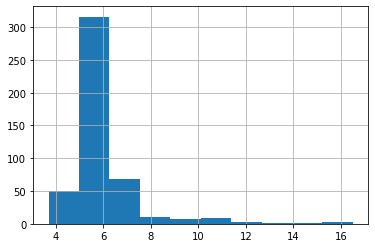

In [27]:
black_nhan.A1c.hist()